# Retrival augment generation (RAG)

Here, we show how SuperSCC-built-in RAG system to utilize SuperSCC-hierarchical markers for celll type annotation efficiently.

Firstly, it is recommended to install Qdrant vector data base within your local environment. For how to install Qdrant, you can follow the [official tutorial](https://qdrant.tech/documentation/quickstart/). 

After installing Qdrant, you can import SuperSCC-based-RAG relevant objects: 

In [ ]:
from SuperSCC.rag import SimpleRAG, ConnectRAG

The SuperSCC-derived hierarchical cluster markers of 99 datasets could be downloaded [here](https://github.com/tf1993614/SuperSCC/tree/main/RAG_data). After unzipping, they can be encoded and then initiate the RAG system in the following approach:

In [ ]:
SimRAG = SimpleRAG(file_path = "the path to downloaded files folder", file_type = "csv")

# file_path should be the path to the downloaded file

In [ ]:
# initiate RAG
# then, each row of the downloaded file would be encoded and stored in qdrant vector 
SimRAG.run_rag(
    text_embedding_model = "BAAI/bge-m3",
    qdrant_location = None,
    qdrant_url = "http://localhost:6333",
    llm_model = "Qwen/QwQ-32B",
    llm_api_key = "#######", # your api key
    llm_base_url = "######", # the base url to model provider
    metadata_columns = ["Data", "Cluster", "Organization", "cell_type", "level"],
    collection_name = "SuperSCC"
)

Once initization is done, you can get the represented cell type of your query gene list at different levels:

In [ ]:
query_gene_list = "STMN1,HMGN2,HMGB2,HMGB1P5,H2AFV,HIST1H4C,ENSG00000259316,LINC01572,ENSG00000187951,NUSAP1,PTTG1,TACC3,IQGAP3,ENSG00000267374,BARD1,UBE2C,SKA2,SMC4,DIAPH3,MELK,TOP2A,HMGB3,SMC2,CIT,TK1,TYMS,CKAP2"

SimRAG.get_answer(gene_list = query_gene_list, hierarchy_search=True, hybrid_search=True)

**Introduction**  
The provided gene list suggests two levels of cell type annotation:  
- **Level 1**: **Proliferating cells**, based on the presence of core proliferation markers and absence of conflicting tissue-specific genes.  
- **Level 2**: **Proliferating alveolar macrophages**, supported by organ-specific context (lung) and macrophage-associated genes, further refining the generic proliferating cell identity.  

---

### **Detailed Evidence**  

#### **Key Evidence from the Gene List**  
**Level 1 Evidence**  
The gene list contains a cluster of hallmark proliferation markers, including:  
- **STMN1**, **HMGB2**, **NUSAP1**, **PTTG1**, **UBE2C**, **TOP2A**, **TYMS**, **SMC4**, and **SMC2**, which are critical for cell cycle progression, mitosis, and DNA replication [Chen_2020 (M4), Zhang_2019 (M2), Chan_2021 (M3)].  
- Histone variants **HIST1H4C** and **H2AFV**, upregulated during S phase of the cell cycle [Yuan_2018 (M8), Chan_2021 (M3)].  
- Supporting genes like **DIAPH3**, **MELK**, **TACC3**, and **CKAP2**, involved in cytoskeletal rearrangement and mitotic spindle integrity [Chan_2021 (M3), Zhang_2019 (M2)].  

**Level 2 Evidence**  
Additional genes and context refine the cell type to **alveolar macrophages**:  
- **HMGN2** and **HMGB1P5**, chromatin-associated proteins specifically linked to **proliferating alveolar macrophages** in the lung [Adams_2020 (F2)].  
- **STMN1**, a myeloid proliferation marker, is highlighted in macrophage datasets (e.g., **Salcher_2022 (F8)** and **Yuan_2018 (F9)**).  
- Lung-specific localization is inferred via **HMGN2**, which is absent in non-lung macrophage datasets (e.g., **Salcher_2022**) and brain studies [Adams_2020 (F2)].  

---

#### **Key Datasets Supporting This Conclusion**  
**Level 1 Datasets**  
- **Chen_2020 (M4, head and neck)**, **Zhang_2019 (M2, blood)**, and **Chan_2021 (M3, lung)** all identify the listed genes as markers of **proliferating cells**, emphasizing their role in mitosis and DNA synthesis.  
- **Yuan_2018 (M8, brain)**, though labeled as "unknown" cell type, shares proliferation markers (e.g., **HMGN2**, **HMGB2**) with other datasets, supporting a generic proliferating state.  

**Level 2 Datasets**  
- **Adams_2020 (F2, lung)** explicitly links the gene list to **proliferating alveolar macrophages**, with **HMGN2** and **HMGB2** as key differentiators.  
- **Yuan_2018 (F9, brain)** describes **proliferating astrocytes**, but the absence of astrocyte-specific markers (e.g., **GFAP**) in the gene list excludes this.  
- **Salcher_2022 (F8, non-lung macrophages)** identifies proliferating macrophages but lacks **HMGN2**, reinforcing the lung-specific context of the provided genes.  

---

#### **Rule Out Alternative Cell Types**  
**Level 1 Exclusions**  
- **Erythroid progenitors**: Absence of **HBA2**, **HBB**, and **KLF1** rules out red blood cell lineages [Suo_2022_Liver (M1), Wu_2020_2 (M5)].  
- **Brain/immune cells**: No detection of **ITGB7** (lung epithelial marker), **SCGB1A1** (Clara cells), or **GNLY** (cytotoxic T/NK cells) [Chan_2021 (M3), No_public (M4)].  

**Level 2 Exclusions**  
- **Non-lung macrophages**: Datasets like **Salcher_2022 (F8)** and **Pelka_2021_3 (F31)** lack **HMGN2**, a marker specific to alveolar macrophages.  
- **Intestinal epithelial/plasma cells**: Absence of **MYBL2**, **ASPM**, **BCL2L12**, and **CDKN3** excludes these lineages [Pelka_2021_2 (F5), Pelka_2021_4 (F24)].  
- **Alveolar epithelial cells**: No expression of **SFTPC**, **SFTPB**, or **SCGB1A1**, ruling out epithelial origins [Glasner_2023].  

---

### **Final Answer**  
- **Level 1 Identification**: **Proliferating cells**. The gene list contains core proliferation markers (e.g., **STMN1**, **HMGB2**, **UBE2C**) and histone genes (e.g., **HIST1H4C**) that are consistently associated with actively dividing cells across blood, head and neck, and lung datasets. The absence of tissue-specific markers for erythroid, brain, or immune cells supports this generic classification.  
- **Level 2 Identification**: **Proliferating alveolar macrophages**. The lung-specific chromatin marker **HMGN2** and the absence of non-lung macrophage or epithelial markers (e.g., **GFAP**, **SFTPC**) align with the **Adams_2020 (F2)** dataset, which explicitly identifies these genes in alveolar macrophages.  

This hierarchical analysis confirms that while the genes broadly indicate a proliferating state, their organ-specific context and macrophage-associated markers refine the cell type to **proliferating alveolar macrophages**.

When you have already initiated the RAG system at the first time, you can directly load the vector databse using ConnectRAG object:

In [ ]:
cRAG = ConnectRAG(
    host = None,
    api_key = None,
    location = None,
    url = "http://localhost:6333",
    collection_name = "SuperSCC",
    embedding_model = "BAAI/bge-m3"
)

cRAG.connect_client()

Then, you can get the similar approach to get the cell type annotation:

In [ ]:
cRAG.get_answer(gene_list = query_gene_list, hierarchy_search=True, hybrid_search=True)

To be user-friendly, we also built an interface for researchers who have less coding skills. To initizate the interface, you should run the following code in the command:

In [ ]:
# run the following code in command
# streamlit run app.py

Note: The `app.py` file stays in the 'SuperSCC/rag' folder 

Then, open the url in your browser and then the UI will come out

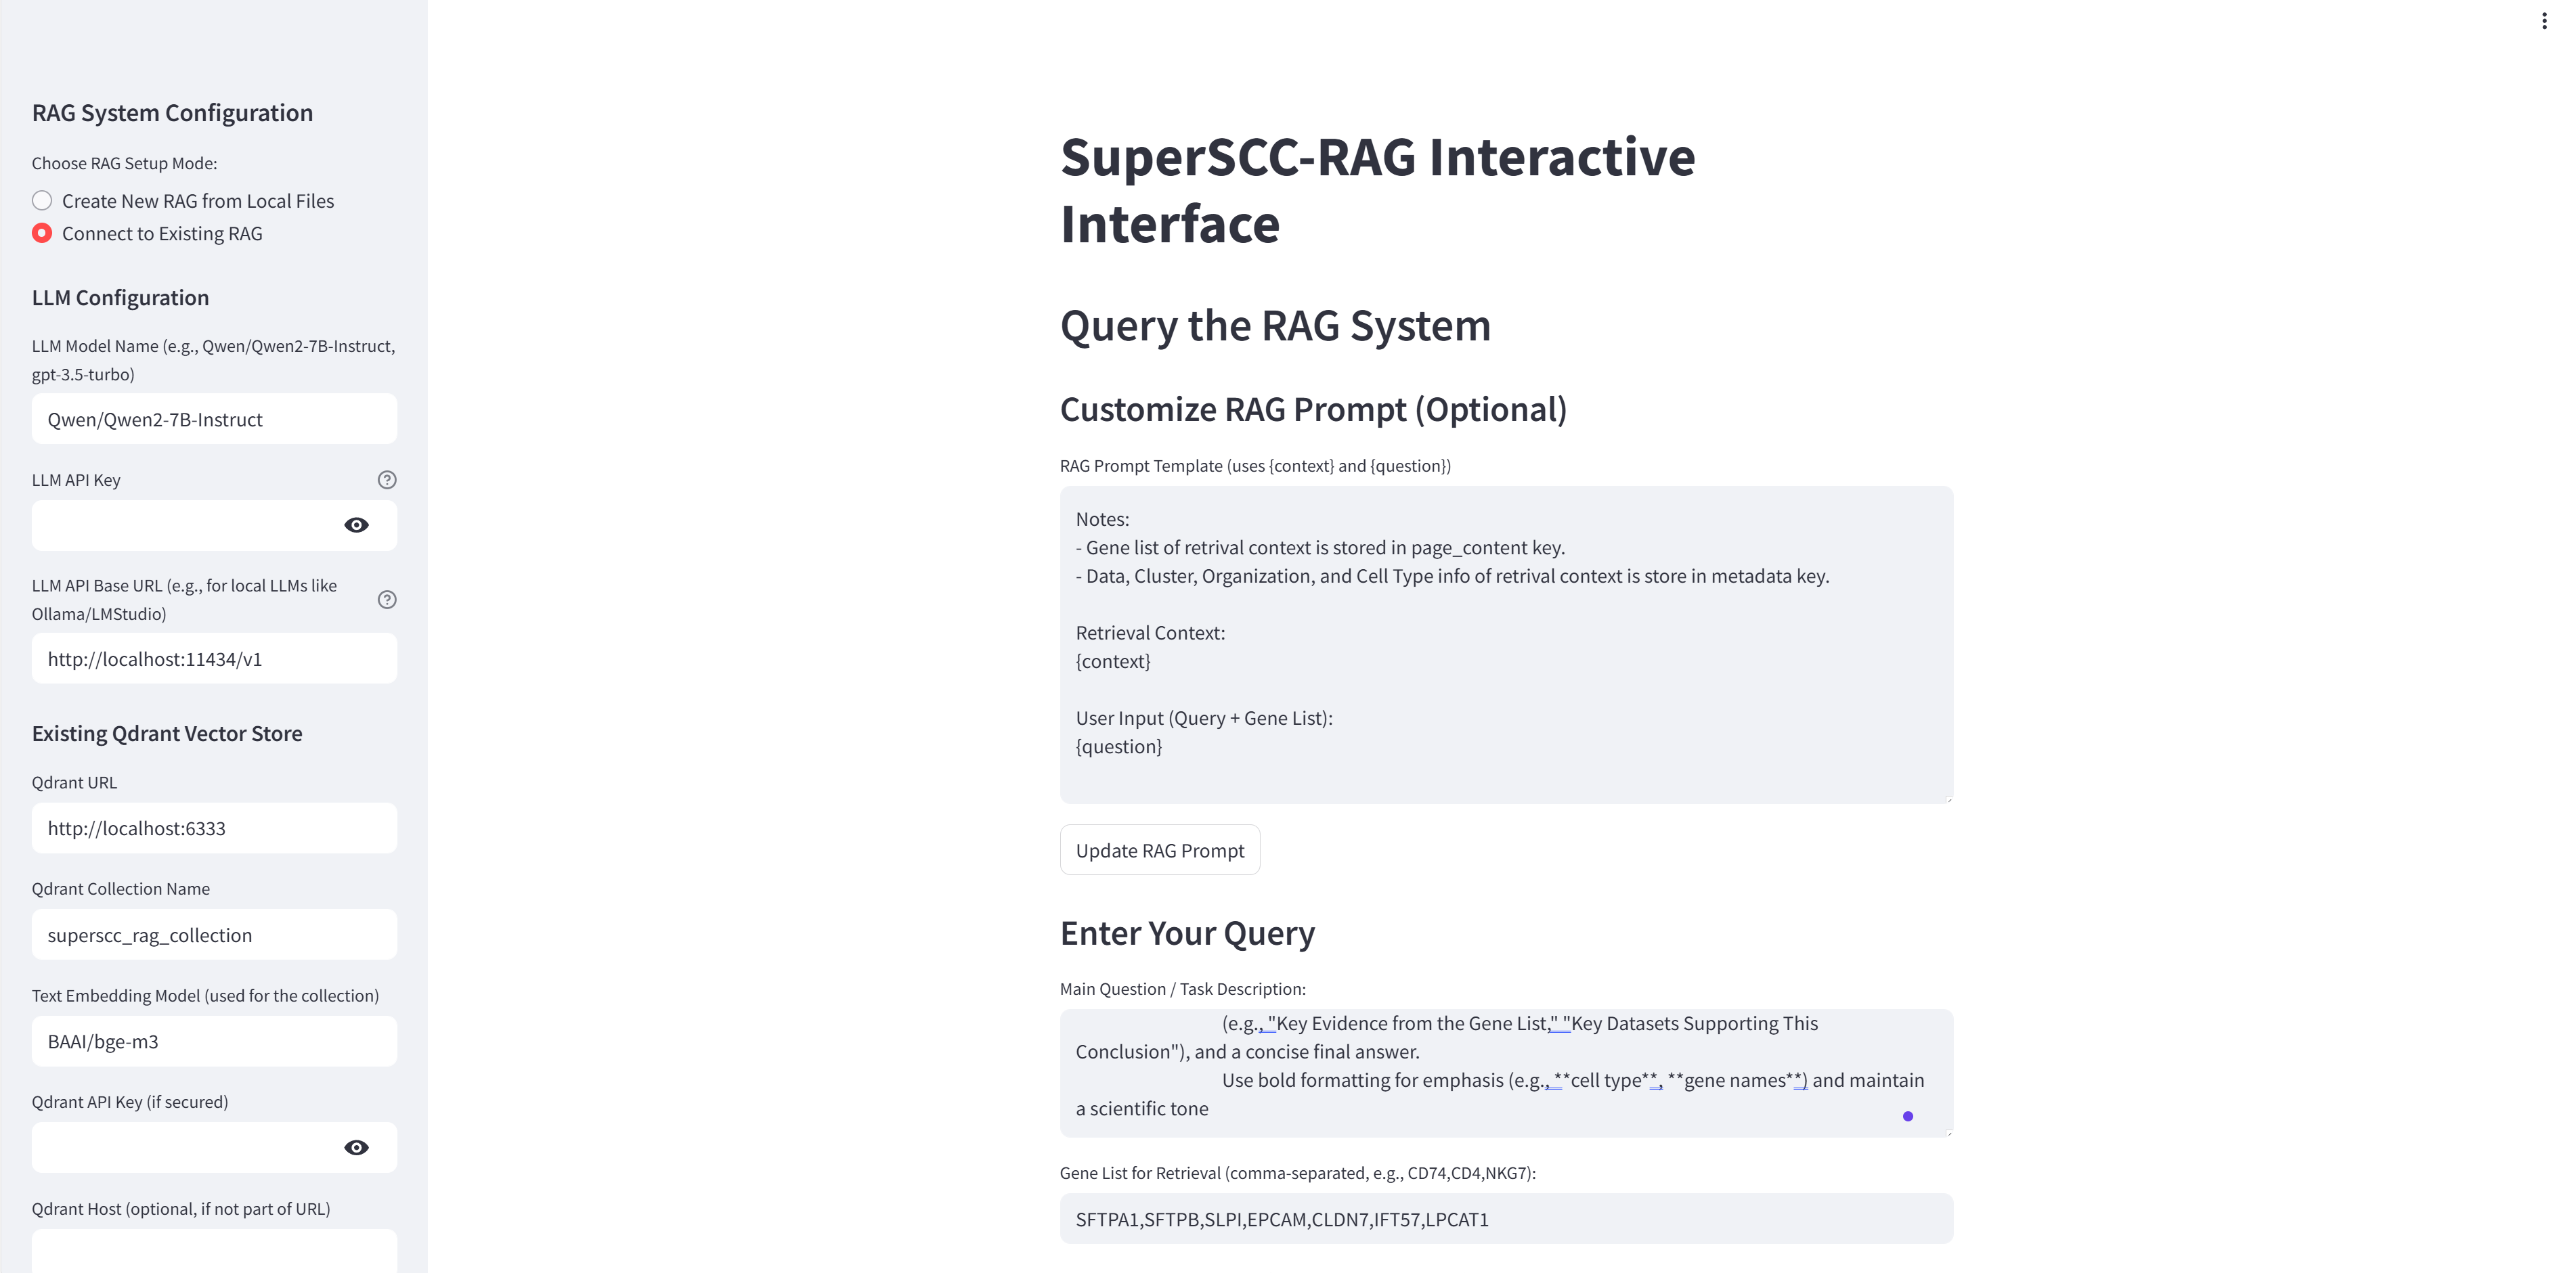

The left side bar can control whether to create a new RAG or connect an existing RAG as well as other parameters to initialize the RAG system. Once it sets done, you can enter your query gene list as shown in the right panel, then you can get the represented cell type. 